#**Builds, Trains & Tests your XGBoost Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score

In [9]:
# Load the dataset
df = pd.read_csv("CVD_cleaned.csv")

# Drop disease-related features (but keep Heart_Disease as target)
disease_features = [ 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']
df = df.drop(columns=disease_features)

# Encode all categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop(columns='Heart_Disease')
y = df['Heart_Disease']

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, max_depth=6, eta=0.3)
xgb.fit(X_train, y_train)

# Predict probabilities and class labels
y_proba = xgb.predict_proba(X_test)
y_pred = xgb.predict(X_test)

# Calculate loss and accuracy
loss = log_loss(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2267
Test Accuracy: 0.9183


#**Plots Metrics**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

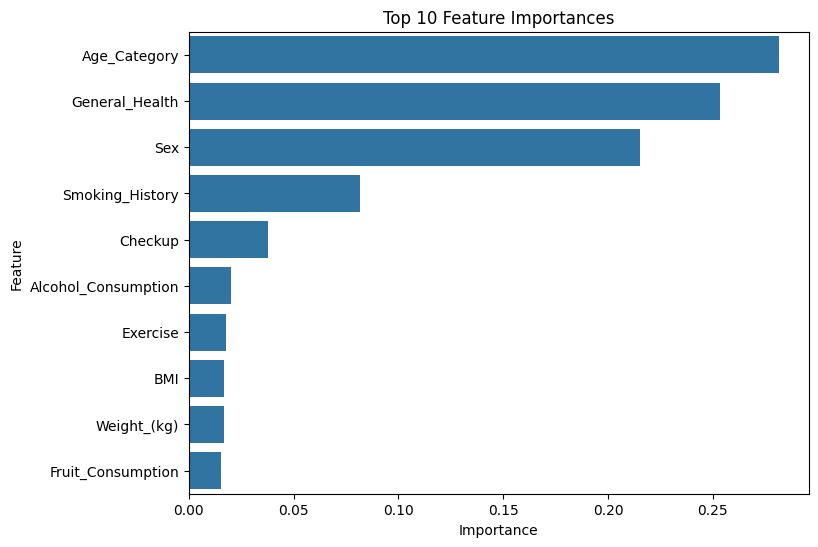

In [11]:
# Feature Importance
plt.figure(figsize=(8, 6))
xgb.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb.feature_importances_}).sort_values(by='Importance', ascending=False)

sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances")
plt.show()

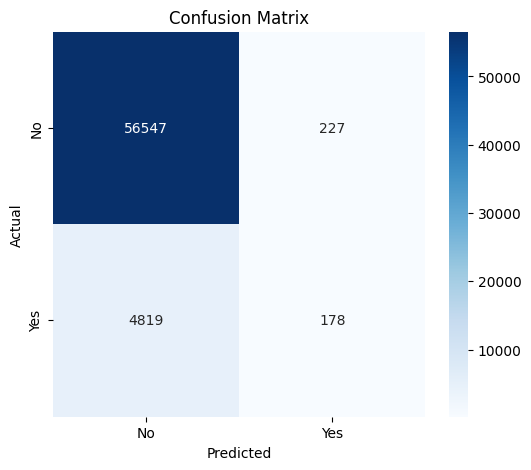

In [12]:
# Confusion Matrix
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#**Applies the Model**

In [13]:
# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Get the original patient IDs (row indices in the original dataset)
patient_ids = X_test.index

# Combine and sort by patient ID
predictions = sorted(zip(patient_ids, y_pred))

# Print predictions sorted by actual patient ID
for patient_id, pred in predictions:
    status = "has heart disease" if pred == 1 else "does not have heart disease"
    print(f"Patient {patient_id} {status}")

Streaming output truncated to the last 5000 lines.
Patient 283772 does not have heart disease
Patient 283782 does not have heart disease
Patient 283790 does not have heart disease
Patient 283791 does not have heart disease
Patient 283792 does not have heart disease
Patient 283793 does not have heart disease
Patient 283798 does not have heart disease
Patient 283807 does not have heart disease
Patient 283809 does not have heart disease
Patient 283814 does not have heart disease
Patient 283815 does not have heart disease
Patient 283818 does not have heart disease
Patient 283826 does not have heart disease
Patient 283836 does not have heart disease
Patient 283838 does not have heart disease
Patient 283839 does not have heart disease
Patient 283851 does not have heart disease
Patient 283858 does not have heart disease
Patient 283862 does not have heart disease
Patient 283863 does not have heart disease
Patient 283864 does not have heart disease
Patient 283866 does not have heart disease
Pat